# Predicting Code Bugs (S3E23)

https://www.kaggle.com/competitions/playground-series-s3e23

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [34]:
# Seaborn
rc = {
    "axes.facecolor": "#243139",
    "figure.facecolor": "#243139",
    "axes.edgecolor": "#000000",
    "grid.color": "#000000",
    "font.family": "arial",
    "axes.labelcolor": "#FFFFFF",
    "xtick.color": "#FFFFFF",
    "ytick.color": "#FFFFFF",
    "grid.alpha": 0.4
}
sns.set(rc=rc)

# Useful line of code to set the display option so we could see all the columns in pd dataframe
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [35]:
original = pd.read_csv('data/jm1.csv')
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
n_cols = train.columns[1:-1] #Pertinent training variables

#Null Values in Each df
dataframes = {'original': original, 'train': train, 'test': test}
result = {name: df.isna().sum() for name, df in dataframes.items()}
result_df = pd.DataFrame(result)
result_df

,original,train,test
b,0.00,0,0.00
branchCount,0.00,0,0.00
d,0.00,0,0.00
defects,0.00,0,NaN
e,0.00,0,0.00
ev(g),0.00,0,0.00
i,0.00,0,0.00
id,NaN,0,0.00
iv(g),0.00,0,0.00
l,0.00,0,0.00


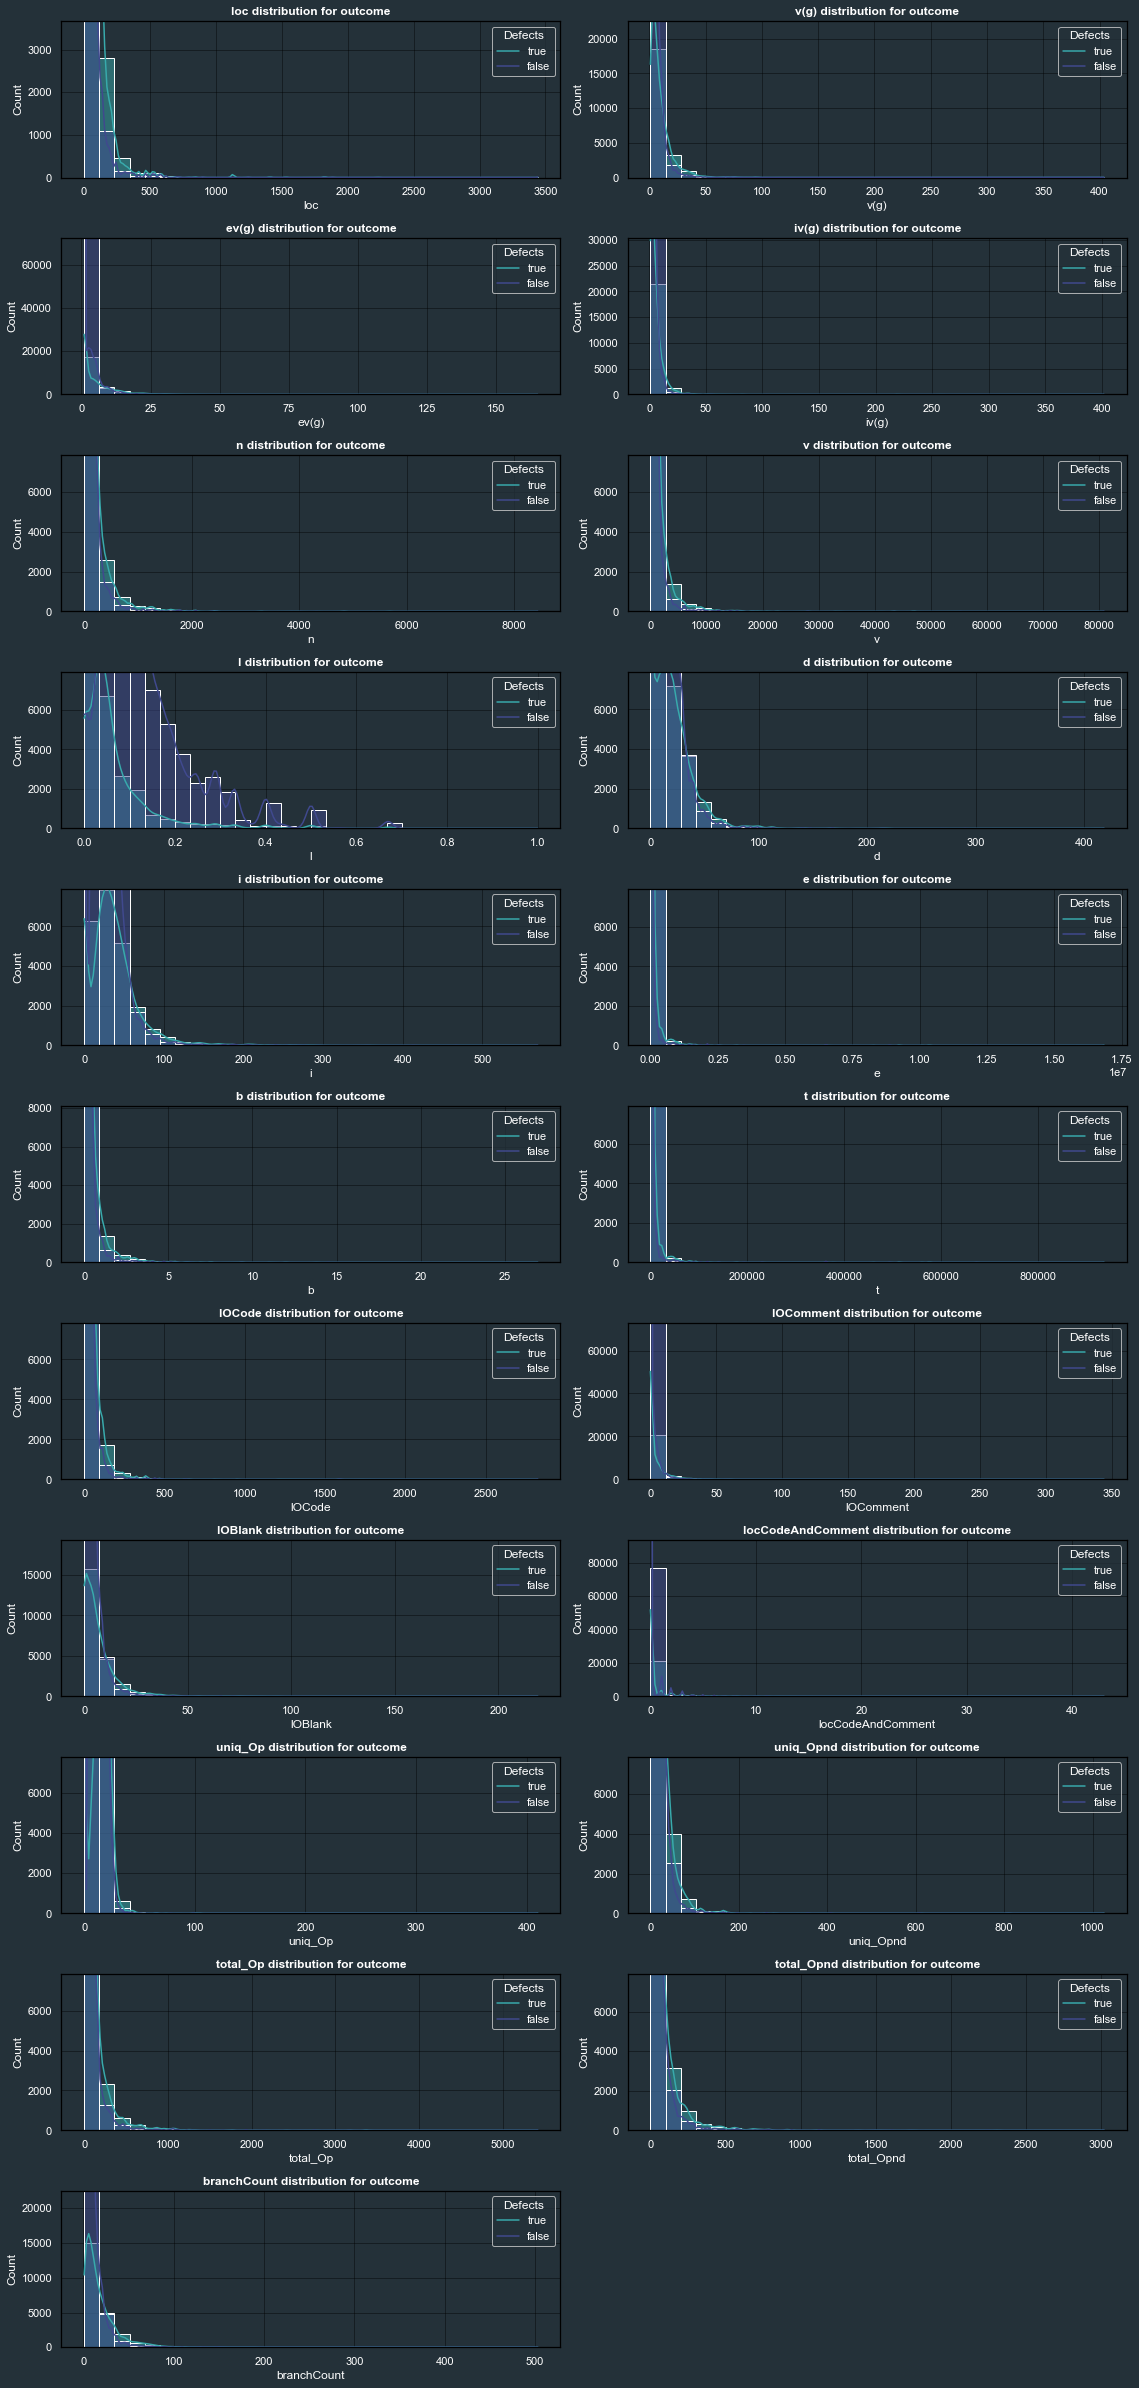

In [36]:
plt.figure(figsize=(16, len(n_cols) * 3))

for i, col in enumerate(n_cols):
    # Plotting for outcome
    plt.subplot(len(n_cols), 2, i+1)
    sns.histplot(x=col, hue="defects", data=train, bins=30, kde=True, palette='mako')
    plt.title(f"{col} distribution for outcome", fontweight="bold", color = 'white')
    plt.ylim(0, train[col].value_counts().max() + 10)
    
    
    plt.legend(title="Defects", loc='upper right', labels=['true', 'false'], labelcolor='white').get_title().set_color("white")
    
plt.tight_layout()
plt.show()

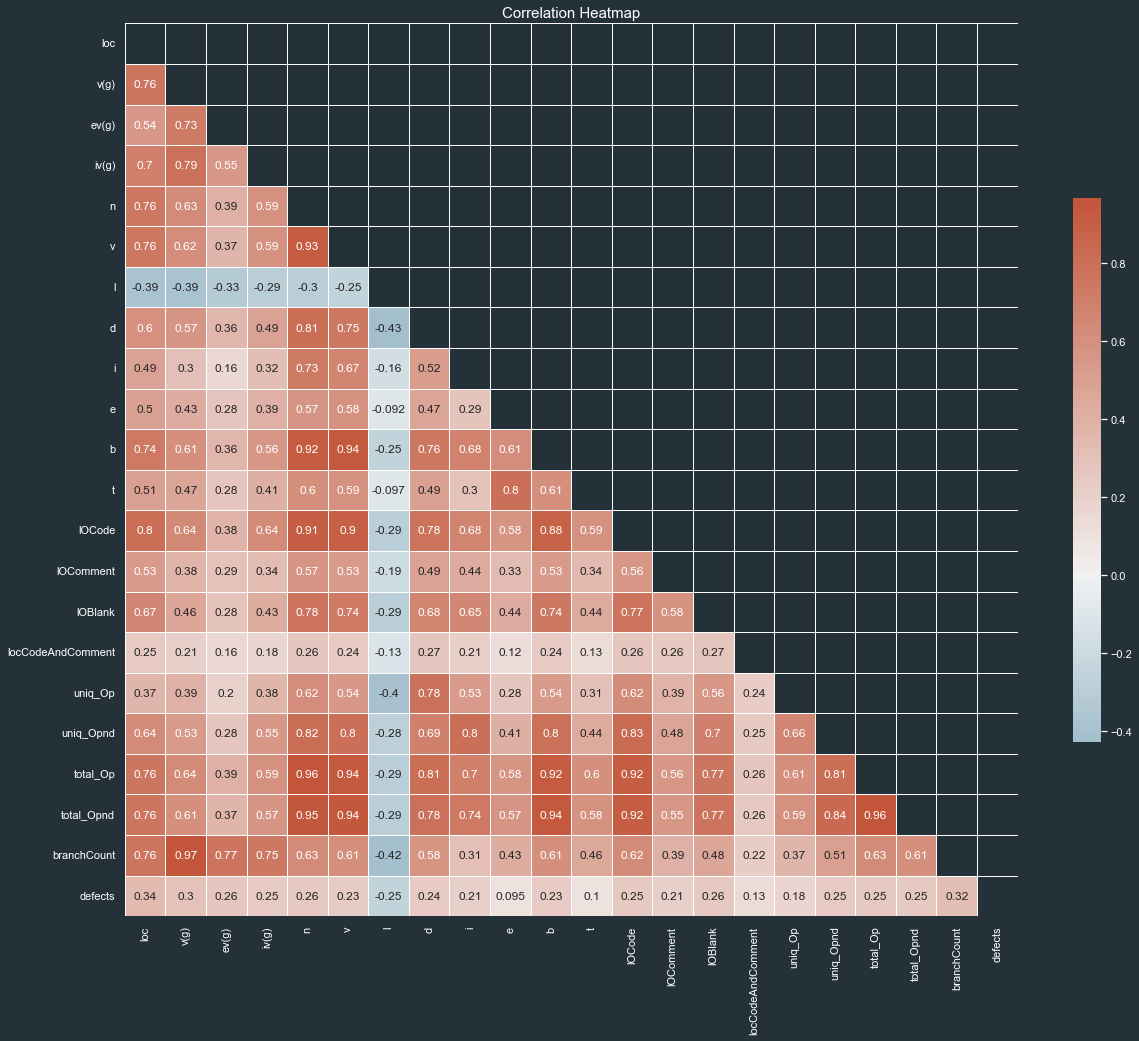

In [37]:
def plot_correlation_heatmap(df):
    corr = df.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))

    plt.figure(figsize=(20, 20))

    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    
    sns.heatmap(corr, mask=mask,  center=0, 
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, cmap=cmap)

    plt.title("Correlation Heatmap", size=15, color='white')
    plt.show()

plot_correlation_heatmap(train.drop(columns='id'))

In [38]:
train = pd.concat([train, original], ignore_index=True)
train.drop_duplicates(inplace=True)

train.dtypes

id                   float64
loc                  float64
v(g)                 float64
ev(g)                float64
iv(g)                float64
n                    float64
v                    float64
l                    float64
d                    float64
i                    float64
e                    float64
b                    float64
t                    float64
lOCode                 int64
lOComment              int64
lOBlank                int64
locCodeAndComment      int64
uniq_Op               object
uniq_Opnd             object
total_Op              object
total_Opnd            object
branchCount           object
defects                 bool
dtype: object

In [40]:
def clean_entries(df: pd.DataFrame) -> pd.DataFrame:
    for col in ['uniq_Op', 'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount']:
        df = df[pd.to_numeric(df[col], errors='coerce').notna()]
        df[col] = df[col].astype(float)
    return df


train = clean_entries(train)
test = clean_entries(test)

id                   float64
loc                  float64
v(g)                 float64
ev(g)                float64
iv(g)                float64
n                    float64
v                    float64
l                    float64
d                    float64
i                    float64
e                    float64
b                    float64
t                    float64
lOCode                 int64
lOComment              int64
lOBlank                int64
locCodeAndComment      int64
uniq_Op              float64
uniq_Opnd            float64
total_Op             float64
total_Opnd           float64
branchCount          float64
defects                 bool
dtype: object